# Clustering using K-Means clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load the data of multivar.txt

def load_data(filename):
    x = []
    y = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            data = [float(i) for i in line.split(',')]
            x.append(data[0])
            y.append(data[1])
    
    x = np.array(x)
    y = np.array(y)
    data = list(zip(x, y))
    data = [list(i) for i in data]
    return(data)

data = load_data("data_multivar.txt")
data = np.array(data)
nclusters = 4

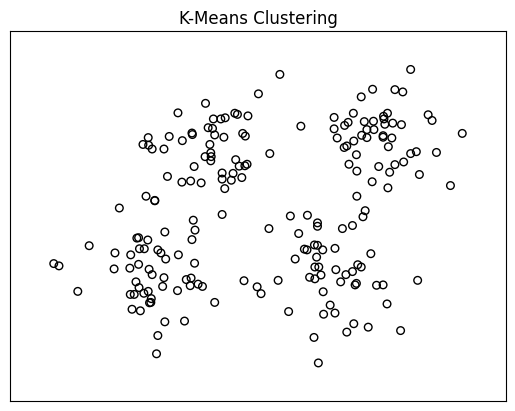

In [3]:
plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', facecolor='none', edgecolors='k', s=30)

# for limiting the data by minimum and maximum
xmin, xmax = min(data[:,0] - 1), max(data[:,0] + 1)
ymin, ymax = min(data[:,1] - 1), max(data[:,1] + 1)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.title("K-Means Clustering")
plt.xticks(())
plt.yticks(())
plt.show()

### Train Model

In [4]:
kmeans = KMeans(n_clusters=nclusters, init='k-means++', n_init=10)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=10)

In [5]:
stepsize = 0.01
xmin, xmax = min(data[:,0] - 1), max(data[:,0] + 1)
ymin, ymax = min(data[:,1] - 1), max(data[:,1] + 1)

xvalue, yvalue = np.meshgrid(np.arange(xmin, xmax, stepsize), np.arange(ymin, ymax, stepsize))
predictedLabels = kmeans.predict(np.c_[xvalue.ravel(), yvalue.ravel()])
data[:1]

array([[ 1.96, -0.09]])

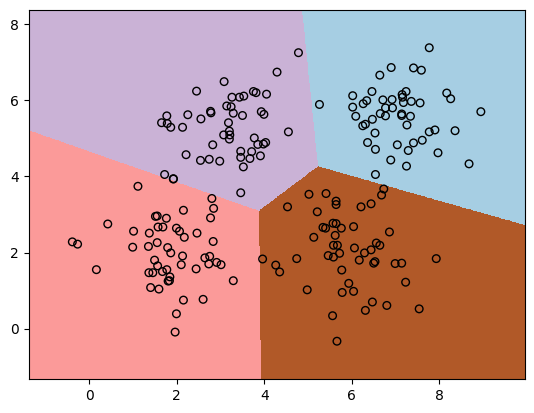

In [6]:
predictedLabels = predictedLabels.reshape(xvalue.shape)
plt.figure()
plt.clf()
plt.imshow(predictedLabels,interpolation='nearest',extent=(xmin,xmax,ymin,ymax),cmap=plt.cm.Paired,aspect='auto',origin='lower')
plt.scatter(data[:,0], data[:,1],marker='o',facecolor='none',edgecolors='k',s=30)


### Overlay centroids on top of the graph

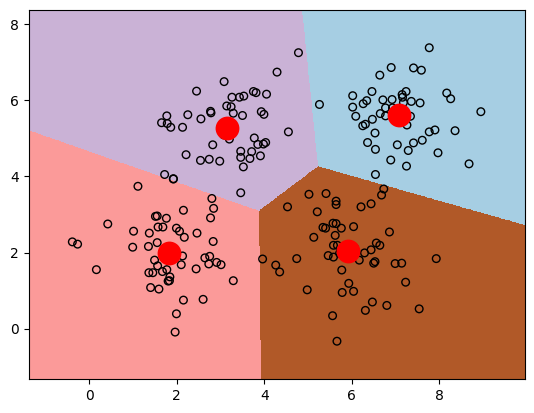

In [7]:
plt.imshow(predictedLabels,interpolation='nearest',extent=(xmin,xmax,ymin,ymax),cmap=plt.cm.Paired,aspect='auto',origin='lower')
plt.scatter(data[:,0],data[:,1],marker='o', facecolor='none',edgecolors='k',s=30)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='o', s=200, facecolor='r', linewidths=3, color='r', zorder=10)
xmin, xmax = min(data[:,0] -1), max(data[:,0] + 1)
ymin, ymax = min(data[:,1] -1), max(data[:,1] + 1)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks()
plt.yticks()
plt.show()